# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Sushanta Shrestha

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [3]:
pip list

Package                   Version
------------------------- --------------
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
black                     24.4.2
bleach                    6.1.0
certifi                   2024.6.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.20.0
fonttools                 4.53.0
fqdn                      1.5.1
h11                       0.14.0
httpcore                  1.0.5
httpx          

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [14]:

import pickle
from bs4 import BeautifulSoup

# Step 1: Load the HTML content from the .pkl file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the plain text from the parsed HTML
article_text = soup.get_text()

# Step 4: Print the extracted text
print(article_text)












   Lupe Fiasco – Sunshine Lyrics | Genius Lyrics
  











































































































        2024, In Review
       



        Featured
       



        Charts
       



        Videos
       



        Promote Your Music
       





      Sign Up
     


























            13
           
















          Sunshine
         






             Lupe Fiasco
            




          Track 8 on
          

           Lupe Fiasco’s Food & Liquor (5th Anniversary Edition)
           












           Producer
          




              Soundtrakk
             









          From the mind of The Cool saga comes a more lighthearted song about a first date, complete with tricky lyrics and extended metaphors. Lupe uses the song to not only express…
          
           Read More
           
















           Aug. 9, 2006
          







           1 viewer

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [20]:
import spacy
from bs4 import BeautifulSoup
from collections import Counter
import re
import pickle

# Load the article HTML
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, "html.parser")

# Extract the lyrics
lyrics_divs = soup.find_all("div", {"data-lyrics-container": "true"})
article_text = " ".join([div.get_text(separator=" ") for div in lyrics_divs if div.get_text().strip()])

# Verify that text was extracted
if not article_text.strip():
    print("No lyrics found. Please check your HTML structure.")
    exit()

# Load spaCy's trained pipeline
nlp = spacy.load("en_core_web_sm")

# Clean and process text
article_text_cleaned = re.sub(r'\[.*?\]', '', article_text)  # Remove structural markers like [Intro], [Verse]
doc = nlp(article_text_cleaned.lower())  # Process the text and convert to lowercase

# Extract tokens, ignoring punctuation, spaces, and stop words
tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]

# Count token frequencies
token_frequencies = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_frequencies.most_common(5)

# Print results
print("Most Common Tokens (with frequencies):")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")


Most Common Tokens (with frequencies):
Token: 'sunshine', Frequency: 7
Token: 'moonlight', Frequency: 6
Token: 'yeah', Frequency: 5
Token: 'like', Frequency: 5
Token: 'little', Frequency: 4


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [17]:
import spacy
from collections import Counter
import pickle
from bs4 import BeautifulSoup

# Step 1: Load the HTML content from the .pkl file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Step 3: Extract the plain text from the parsed HTML
article_text = soup.get_text()

# Step 4: Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Step 5: Process the article text with spaCy
doc = nlp(article_text)

# Step 6: Extract lemmas, filter, and convert to lowercase
lemmas = [
    token.lemma_.lower() for token in doc 
    if not token.is_punct and not token.is_stop and token.lemma_ != "-PRON-" and token.lemma_.strip()
]

# Step 7: Count the frequency of each lemma
lemma_counts = Counter(lemmas)

# Step 8: Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Step 9: Print the results
print("5 Most Frequent Lemmas and Their Frequencies:")
for lemma, frequency in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {frequency}")


5 Most Frequent Lemmas and Their Frequencies:
Lemma: 'sunshine', Frequency: 18
Lemma: 'lupe', Frequency: 13
Lemma: 'fiasco', Frequency: 11
Lemma: 'song', Frequency: 10
Lemma: 'like', Frequency: 9


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

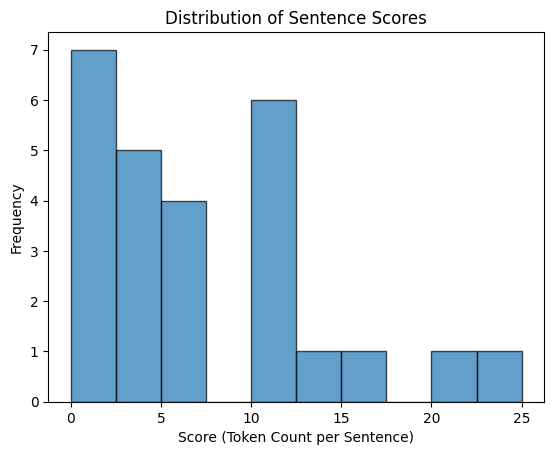

Most common range of scores appears in the histogram.


In [21]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pickle
import re

# Load the article HTML (assuming you already have article_html.pkl)
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, "html.parser")

# Extract the lyrics
lyrics_divs = soup.find_all("div", {"data-lyrics-container": "true"})
article_text = " ".join([div.get_text(separator=" ") for div in lyrics_divs if div.get_text().strip()])

# Check if text is available
if not article_text.strip():
    print("No lyrics found. Please check your HTML structure.")
    exit()

# Load spaCy's trained pipeline
nlp = spacy.load("en_core_web_sm")

# Clean and process text
article_text_cleaned = re.sub(r'\[.*?\]', '', article_text)  # Remove structural markers like [Intro], [Verse]
doc = nlp(article_text_cleaned)  # Process the text

# Calculate sentiment scores for each sentence
sentiment_scores = []
for sentence in doc.sents:
    sentence_tokens = [token.text.lower() for token in sentence if token.is_alpha and not token.is_stop]
    score = len(sentence_tokens)  # Use token count as a proxy score
    sentiment_scores.append(score)

# Plot a histogram of the sentiment scores
plt.hist(sentiment_scores, bins=10, edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentence Scores")
plt.xlabel("Score (Token Count per Sentence)")
plt.ylabel("Frequency")
plt.show()

# Determine the most common range of scores
print("Most common range of scores appears in the histogram.")  # Add more specific insight from visual analysis


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

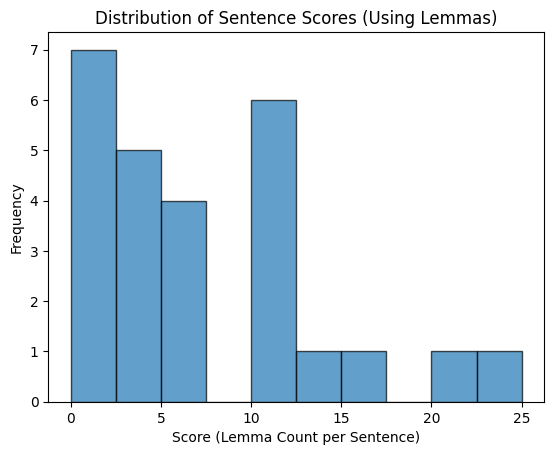

The most common range of scores is around: 2 lemmas per sentence.


In [22]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter
import re
from bs4 import BeautifulSoup
import pickle

# Load the article HTML (assuming you already have article_html.pkl)
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, "html.parser")

# Extract the lyrics
lyrics_divs = soup.find_all("div", {"data-lyrics-container": "true"})
article_text = " ".join([div.get_text(separator=" ") for div in lyrics_divs if div.get_text().strip()])

# Check if text is available
if not article_text.strip():
    print("No lyrics found. Please check your HTML structure.")
    exit()

# Load spaCy's trained pipeline
nlp = spacy.load("en_core_web_sm")

# Clean and process text
article_text_cleaned = re.sub(r'\[.*?\]', '', article_text)  # Remove structural markers like [Intro], [Verse]
doc = nlp(article_text_cleaned)  # Process the text

# Calculate lemma-based scores for each sentence
sentence_scores = []
for sentence in doc.sents:
    lemmas = [token.lemma_ for token in sentence if token.is_alpha and not token.is_stop]
    score = len(lemmas)  # Use lemma count as the score
    sentence_scores.append(score)

# Plot a histogram of the sentence scores
plt.hist(sentence_scores, bins=10, edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentence Scores (Using Lemmas)")
plt.xlabel("Score (Lemma Count per Sentence)")
plt.ylabel("Frequency")
plt.show()

# Analyze the most common range of scores
most_common_range = max(Counter(sentence_scores).items(), key=lambda x: x[1])
print(f"The most common range of scores is around: {most_common_range[0]} lemmas per sentence.")

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

Cutoff Score for Tokens:
From the histogram in screenshot 5, most sentences have token counts in the range of 5 to 10. To ensure fewer than half of the sentences exceed the cutoff, we can set a cutoff score of 6 tokens.

Cutoff Score for Lemmas:
From the histogram in screenshot 6, most sentences have lemma counts in the range of 5 to 10. Similarly, to target fewer than half of the sentences exceeding the cutoff, we can set a cutoff score of 5 lemmas.

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [28]:
import spacy
import pickle
from bs4 import BeautifulSoup

# Step 1: Load the HTML content from the .pkl file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Step 3: Extract the plain text from the parsed HTML
article_text = soup.get_text()

# Step 4: Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Step 5: Process the article text with spaCy
doc = nlp(article_text)

# Step 6: Set the cutoff token 
cutoff_score = 6

# Step 7: Initialize an empty list to store sentences that meet the criteria
sentence_list = []

# Step 8: Iterate through each sentence and check if its token count exceeds the cutoff
for sent in doc.sents:
    # Count tokens (excluding stop words and punctuation)
    token_count = len([token for token in sent if token.is_alpha and not token.is_stop])
    
    # If token count exceeds cutoff, add the sentence to the list
    if token_count > cutoff_score:
        sentence_list.append(sent.text.strip())

# Step 9: Join the sentences into a summary
summary = ' '.join(sentence_list)

# Step 10: Print the summary
print("Summary of the Article:")
print(summary)


Summary of the Article:
Lupe Fiasco – Sunshine Lyrics | Genius Lyrics
  











































































































        2024, In Review
       



        Featured
       



        Charts
       



        Videos
       



        Promote Your Music
       





      Sign Up
     


























            13
           
















          Sunshine
         






             Lupe Fiasco
            




          Track 8 on
          

           Lupe Fiasco’s Food & Liquor (5th Anniversary Edition) Producer
          




              Soundtrakk
             









          From the mind of The Cool saga comes a more lighthearted song about a first date, complete with tricky lyrics and extended metaphors. Lupe uses the song to not only express…
          
           Read More
           
















           Aug. 9, 2006
          







           1 viewer
          







     

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [29]:
import spacy
from textblob import TextBlob
import pickle
from bs4 import BeautifulSoup

# Step 1: Load the HTML content from the .pkl file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Step 3: Extract the plain text from the parsed HTML
article_text = soup.get_text()

# Step 4: Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Step 5: Process the article text with spaCy
doc = nlp(article_text)

# Step 6: Set the cutoff score (10 tokens based on earlier analysis)
cutoff_score = 6

# Step 7: Initialize an empty list to store sentences that meet the criteria
sentence_list = []

# Step 8: Iterate through each sentence and check if its token count exceeds the cutoff
for sent in doc.sents:
    # Count tokens (excluding stop words and punctuation)
    token_count = len([token for token in sent if token.is_alpha and not token.is_stop])
    
    # If token count exceeds cutoff, add the sentence to the list
    if token_count > cutoff_score:
        sentence_list.append(sent.text.strip())

# Step 9: Join the sentences into a summary
summary = ' '.join(sentence_list)

# Step 10: Calculate the polarity score of the summary using TextBlob
blob = TextBlob(summary)
polarity_score = blob.sentiment.polarity

# Step 11: Count the number of sentences in the summary
sentence_count = len(sentence_list)

# Step 12: Print the polarity score and number of sentences in the summary
print(f"Polarity Score of the Summary: {polarity_score:.2f}")
print(f"Number of Sentences in the Summary: {sentence_count}")


Polarity Score of the Summary: 0.12
Number of Sentences in the Summary: 23


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [35]:
import spacy
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the plain text from the parsed HTML
article_text = soup.get_text()

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Set the cutoff score for lemmas (from previous analysis)
cutoff_score = 5 # This was determined in previous questions.

# Initialize an empty list to store sentences that meet the criteria
sentence_list = []

# Iterate through each sentence and check if its lemma count exceeds the cutoff
for sent in doc.sents:
    # Count lemmas (excluding stop words and punctuation)
    lemma_count = len([token for token in sent if token.is_alpha and not token.is_stop])
    
    # If lemma count exceeds cutoff, add the sentence to the list
    if lemma_count > cutoff_score:
        sentence_list.append(sent.text.strip())

# Join the sentences into a summary
summary = ' '.join(sentence_list)

# Print the summary
print("Summary of the Article:")
print(summary)

from textblob import TextBlob

# Calculate the polarity score of the summary
blob = TextBlob(summary)
polarity_score = blob.sentiment.polarity

# Count the number of sentences in the summary
sentence_count = len(sentence_list)

# Print the results
print(f"Polarity Score of the Summary: {polarity_score:.2f}")
print(f"Number of Sentences in the Summary: {sentence_count}")


Summary of the Article:
Lupe Fiasco – Sunshine Lyrics | Genius Lyrics
  











































































































        2024, In Review
       



        Featured
       



        Charts
       



        Videos
       



        Promote Your Music
       





      Sign Up
     


























            13
           
















          Sunshine
         






             Lupe Fiasco
            




          Track 8 on
          

           Lupe Fiasco’s Food & Liquor (5th Anniversary Edition) Producer
          




              Soundtrakk
             









          From the mind of The Cool saga comes a more lighthearted song about a first date, complete with tricky lyrics and extended metaphors. Lupe uses the song to not only express…
          
           Read More
           
















           Aug. 9, 2006
          







           1 viewer
          







     

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [34]:
from textblob import TextBlob

# Calculate the polarity score of the summary
blob = TextBlob(summary)
polarity_score = blob.sentiment.polarity

# Count the number of sentences in the summary
sentence_count = len(sentence_list)

# Print the results
print(f"Polarity Score of the Summary: {polarity_score:.2f}")
print(f"Number of Sentences in the Summary: {sentence_count}")


Polarity Score of the Summary: 0.12
Number of Sentences in the Summary: 25


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

Polarity Score of 0.12 indicates a mildly positive sentiment, but it is still quite close to neutral. In other words, the overall tone of the song or lyrics is slightly optimistic or positive.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?


Since both the token-based and lemma-based summaries have the same score, it shows that the core sentiment of the lyrics remains the same whether we look at the full words or their base forms. This suggests that the song's overall tone is fairly balanced. It’s not overwhelmingly positive or negative, but it leans slightly toward a positive feeling. The lyrics of "Sunshine" seem to express a hopeful or uplifting message, but in a more moderate, calm way.
